<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/Medical_Text_Classification_%E2%80%94_LSTM%2C_BLSTM%2C_GRU%2C_BGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Embedding, Bidirectional
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

# **Partie 1**

In [3]:
df = pd.read_csv('medical_dataset.csv', delimiter=',', encoding='utf-8')

# Vérifier la structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  500 non-null    object
 1   transcription      500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,medical_specialty,transcription
0,Cardiology,Patient reports chest pain and shortness of br...
1,Pediatrics,"Child presents with fever and cough, possible ..."
2,Cardiology,EKG shows abnormal rhythms; consider further c...
3,Orthopedic,X-ray shows a fracture in the distal radius.
4,Surgery,"Surgical site infection noted, antibiotics adm..."


In [4]:
# Supprimer les lignes vides
df = df.dropna()

df.info()  # Vérifier qu'il n'y a plus de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  500 non-null    object
 1   transcription      500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


Séparer les labels et les textes

In [5]:
Y = df['medical_specialty']  # Labels
X = df['transcription']      # Textes

Encodage des labels en numérique

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

print("Exemples d'étiquettes encodées :", Y[:10])
print("Classes :", le.classes_)


Exemples d'étiquettes encodées : [0 4 0 3 7 7 5 4 7 3]
Classes : ['Cardiology' 'Gastroenterology' 'Neurology' 'Orthopedic' 'Pediatrics'
 'Psychiatry' 'Radiology' 'Surgery']


Tokenizer pour transformer le texte en séquences numériques

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 20

token = Tokenizer(num_words=max_words)
token.fit_on_texts(X)
sequences = token.texts_to_sequences(X)

# Padding pour uniformiser la longueur
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    sequences_matrix, Y, test_size=0.33, random_state=42
)

# **Partie 2**

**LSTM**

In [9]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=max_len))
model_lstm.add(LSTM(64, dropout=0.2))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(len(le.classes_), activation='softmax'))

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer=RMSprop(),
                   metrics=['accuracy'])

history_lstm = model_lstm.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_lstm = model_lstm.evaluate(X_test, Y_test)
print("✅ Accuracy LSTM :", score_lstm[1])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.3200 - loss: 2.0605 - val_accuracy: 0.3582 - val_loss: 1.9779
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5356 - loss: 1.9479 - val_accuracy: 0.6269 - val_loss: 1.7915
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6767 - loss: 1.7129 - val_accuracy: 0.7612 - val_loss: 1.5344
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8092 - loss: 1.3971 - val_accuracy: 0.7612 - val_loss: 1.1489
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8714 - loss: 1.0072 - val_accuracy: 0.8507 - val_loss: 0.7495
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9072 - loss: 0.6349 - val_accuracy: 1.0000 - val_loss: 0.4803
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9851 - loss: 0.3847 - val_accuracy: 1.0000 - val_loss: 0.2510
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9939 - loss: 0.1879 - val_accuracy: 1.0000 - val_loss: 0.2286

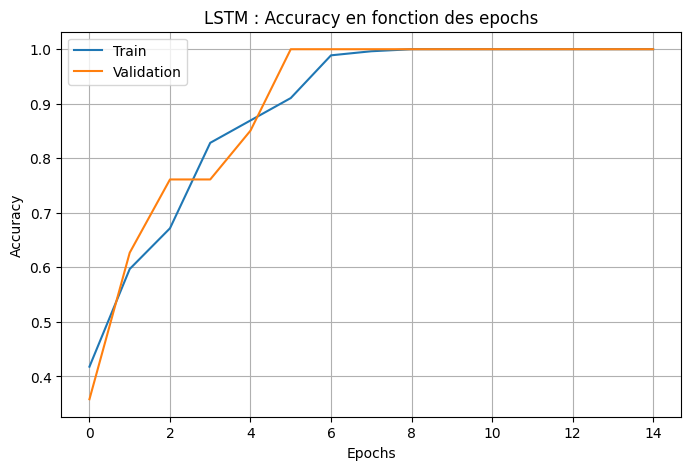

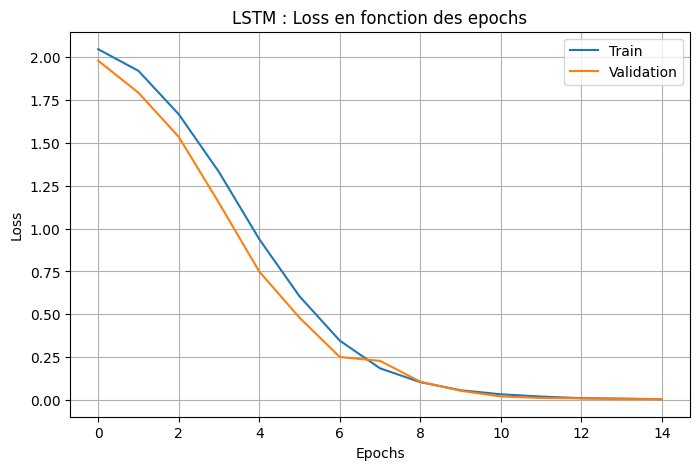

In [10]:
# Accuracy LSTM
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("LSTM : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss LSTM
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['loss'], label='Train')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("LSTM : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **Partie 3**

# **GRU (Gated Recurrent Unit)**

In [11]:
model_gru = Sequential()
model_gru.add(Embedding(max_words, 128, input_length=max_len))
model_gru.add(GRU(64, dropout=0.2))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(len(le.classes_), activation='softmax'))

model_gru.compile(loss='sparse_categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

history_gru = model_gru.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_gru = model_gru.evaluate(X_test, Y_test)
print("✅ Accuracy GRU :", score_gru[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2792 - loss: 2.0465 - val_accuracy: 0.7463 - val_loss: 1.9243
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7574 - loss: 1.8557 - val_accuracy: 0.9104 - val_loss: 1.6651
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8545 - loss: 1.5259 - val_accuracy: 0.8657 - val_loss: 1.3097
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9053 - loss: 1.1416 - val_accuracy: 1.0000 - val_loss: 0.9330
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.7673 - val_accuracy: 1.0000 - val_loss: 0.5388
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.4609 - val_accuracy: 1.0000 - val_loss: 0.2848
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.2341 - val_accuracy: 1.0000 - val_loss: 0.1495
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.1289 - val_accuracy: 1.0000 - val_loss: 0.0796


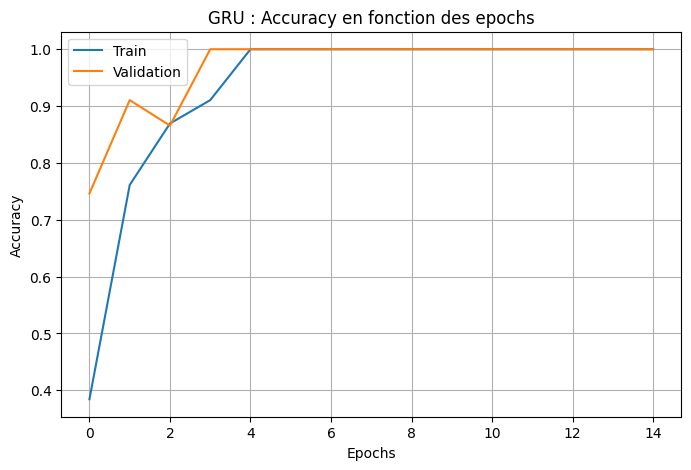

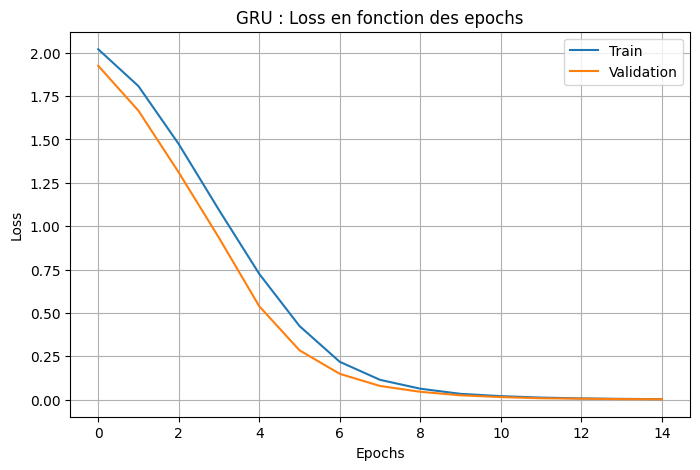

In [12]:
# Accuracy GRU
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['accuracy'], label='Train')
plt.plot(history_gru.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("GRU : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss GRU
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['loss'], label='Train')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("GRU : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **BGRU (Bidirectional GRU)**

In [13]:
model_bgru = Sequential()
model_bgru.add(Embedding(max_words, 128, input_length=max_len))
model_bgru.add(Bidirectional(GRU(64, dropout=0.2)))
model_bgru.add(Dense(32, activation='relu'))
model_bgru.add(Dense(len(le.classes_), activation='softmax'))

model_bgru.compile(loss='sparse_categorical_crossentropy',
                   optimizer=RMSprop(),
                   metrics=['accuracy'])

history_bgru = model_bgru.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_bgru = model_bgru.evaluate(X_test, Y_test)
print("✅ Accuracy BGRU :", score_bgru[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.2146 - loss: 2.0626 - val_accuracy: 0.1045 - val_loss: 1.9842
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3077 - loss: 1.9243 - val_accuracy: 0.7164 - val_loss: 1.7662
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8903 - loss: 1.6850 - val_accuracy: 0.7612 - val_loss: 1.3907
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9226 - loss: 1.2302 - val_accuracy: 0.9403 - val_loss: 0.9175
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9662 - loss: 0.7914 - val_accuracy: 1.0000 - val_loss: 0.4824
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.3812 - val_accuracy: 1.0000 - val_loss: 0.2533
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2029 - val_accuracy: 1.0000 - val_loss: 0.1151
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0922 - val_accuracy: 1.0000 - val_loss: 0.0626


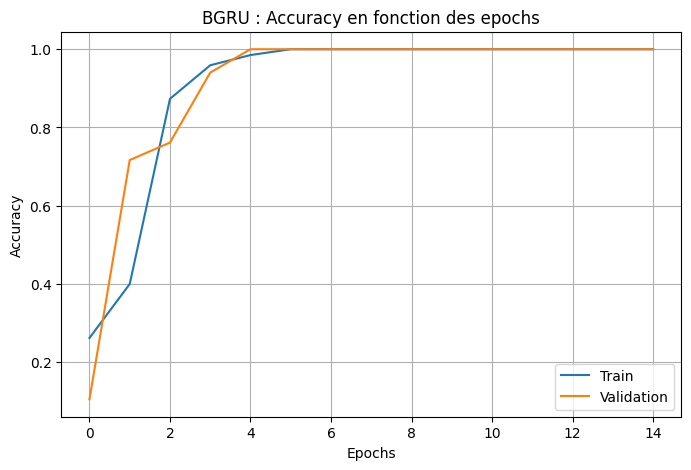

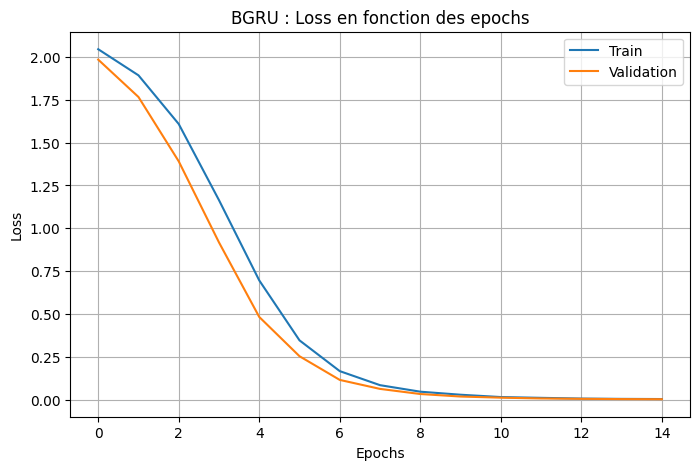

In [14]:
# Accuracy BGRU
plt.figure(figsize=(8,5))
plt.plot(history_bgru.history['accuracy'], label='Train')
plt.plot(history_bgru.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("BGRU : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss BGRU
plt.figure(figsize=(8,5))
plt.plot(history_bgru.history['loss'], label='Train')
plt.plot(history_bgru.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("BGRU : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **BLSTM (Bidirectional LSTM)**

In [15]:
model_blstm = Sequential()
model_blstm.add(Embedding(max_words, 128, input_length=max_len))
model_blstm.add(Bidirectional(LSTM(64, dropout=0.2)))
model_blstm.add(Dense(32, activation='relu'))
model_blstm.add(Dense(len(le.classes_), activation='softmax'))

model_blstm.compile(loss='sparse_categorical_crossentropy',
                    optimizer=RMSprop(),
                    metrics=['accuracy'])

history_blstm = model_blstm.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_blstm = model_blstm.evaluate(X_test, Y_test)
print("✅ Accuracy BLSTM :", score_blstm[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1426 - loss: 2.0754 - val_accuracy: 0.1194 - val_loss: 2.0535
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2657 - loss: 2.0316 - val_accuracy: 0.3582 - val_loss: 1.9849
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4060 - loss: 1.9305 - val_accuracy: 0.2836 - val_loss: 1.8616
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4756 - loss: 1.7421 - val_accuracy: 0.7463 - val_loss: 1.6057
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7905 - loss: 1.4211 - val_accuracy: 0.9104 - val_loss: 1.2243
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9002 - loss: 1.0958 - val_accuracy: 0.8358 - val_loss: 0.9272
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9557 - loss: 0.7739 - val_accuracy: 0.9403 - val_loss: 0.5890
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9659 - loss: 0.5362 - val_accuracy: 1.0000 - val_loss: 0.4489


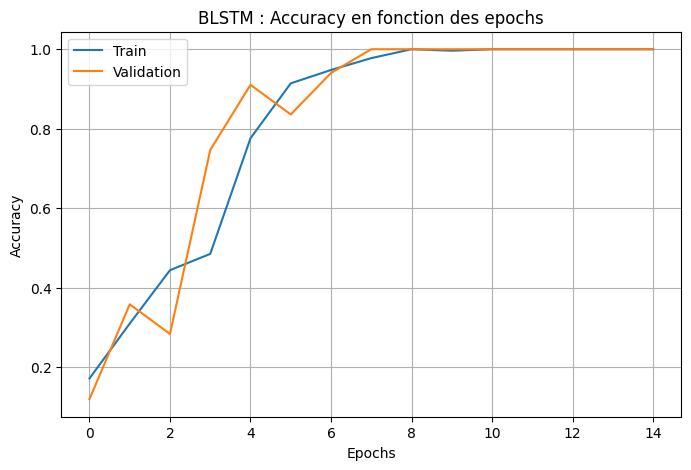

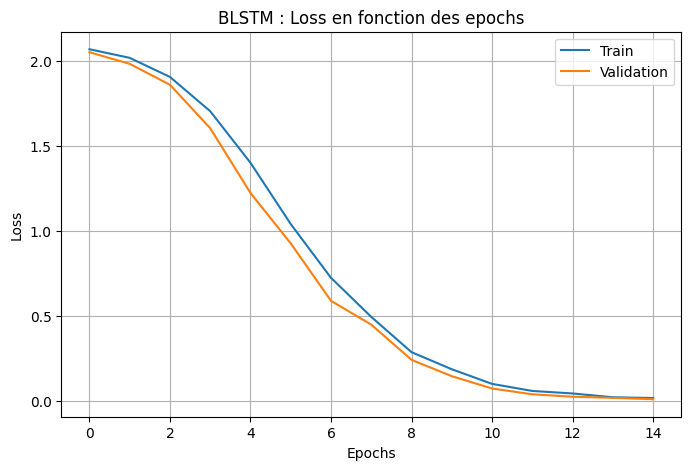

In [16]:
# Accuracy BLSTM
plt.figure(figsize=(8,5))
plt.plot(history_blstm.history['accuracy'], label='Train')
plt.plot(history_blstm.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("BLSTM : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss BLSTM
plt.figure(figsize=(8,5))
plt.plot(history_blstm.history['loss'], label='Train')
plt.plot(history_blstm.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("BLSTM : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
print("🔹 Accuracy LSTM :", score_lstm[1])
print("🔹 Accuracy BLSTM :", score_blstm[1])
print("🔹 Accuracy GRU :", score_gru[1])
print("🔹 Accuracy BGRU :", score_bgru[1])


🔹 Accuracy LSTM : 1.0
🔹 Accuracy BLSTM : 1.0
🔹 Accuracy GRU : 1.0
🔹 Accuracy BGRU : 1.0


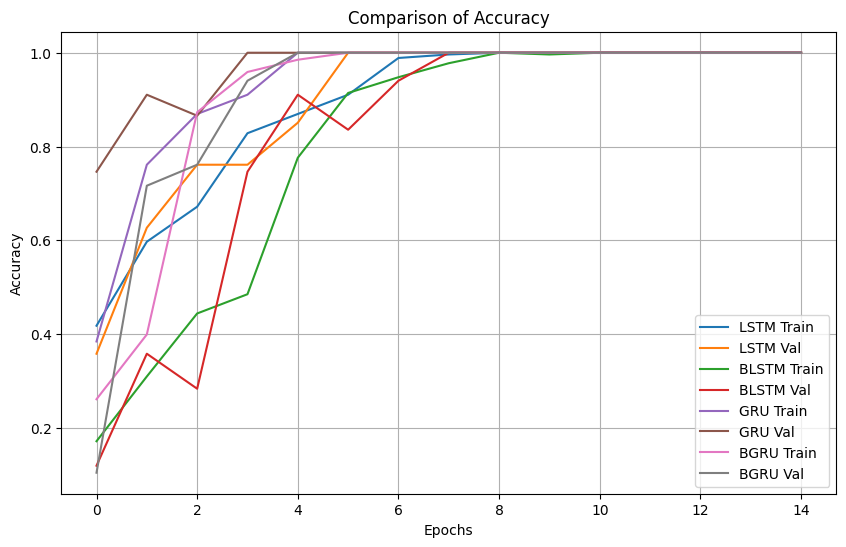

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(history_lstm.history['accuracy'], label='LSTM Train')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val')

plt.plot(history_blstm.history['accuracy'], label='BLSTM Train')
plt.plot(history_blstm.history['val_accuracy'], label='BLSTM Val')

plt.plot(history_gru.history['accuracy'], label='GRU Train')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val')

plt.plot(history_bgru.history['accuracy'], label='BGRU Train')
plt.plot(history_bgru.history['val_accuracy'], label='BGRU Val')

plt.title("Comparison of Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [21]:
models_history = {
    "LSTM": history_lstm,
    "BiLSTM": history_blstm,
    "GRU": history_gru,
    "BiGRU": history_bgru
}

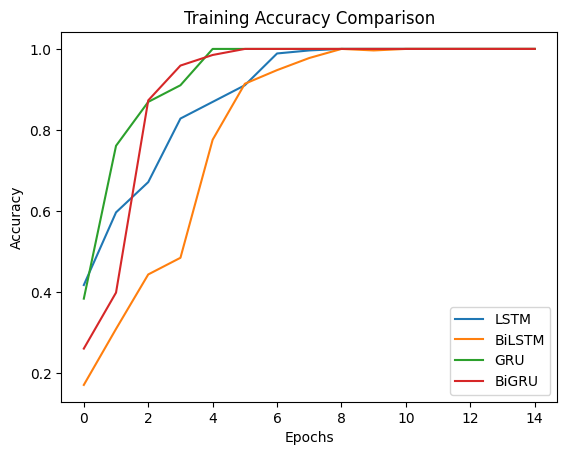

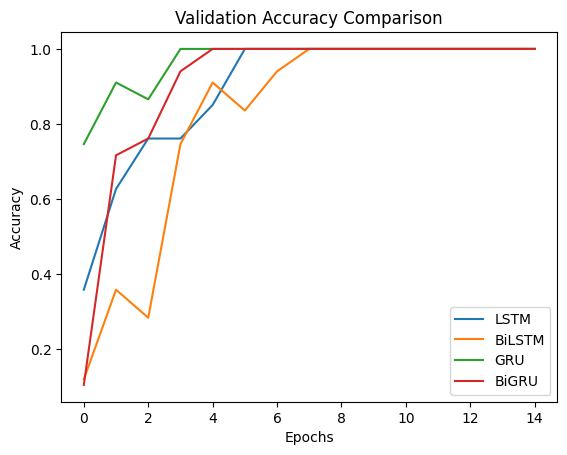

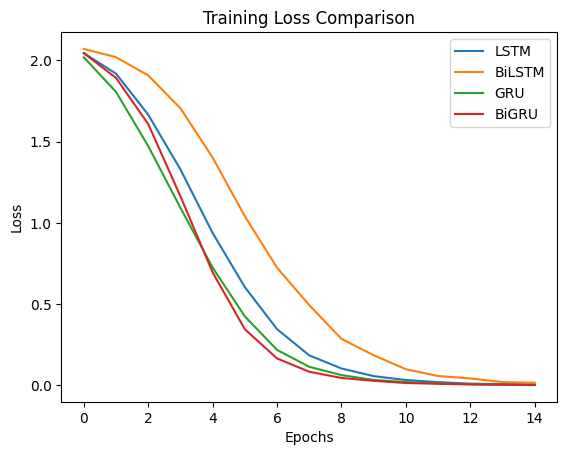

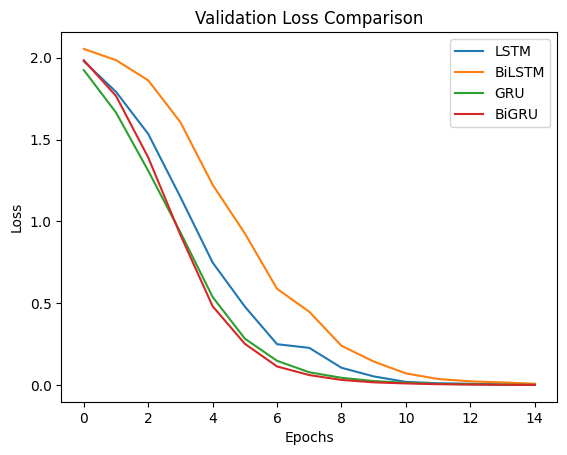

In [22]:
import matplotlib.pyplot as plt

# =============================
# TRAIN ACCURACY
# =============================
plt.figure()
for name, history in models_history.items():
    plt.plot(history.history['accuracy'], label=name)

plt.title("Training Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# =============================
# VALIDATION ACCURACY
# =============================
plt.figure()
for name, history in models_history.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# =============================
# TRAIN LOSS
# =============================
plt.figure()
for name, history in models_history.items():
    plt.plot(history.history['loss'], label=name)

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# =============================
# VALIDATION LOSS
# =============================
plt.figure()
for name, history in models_history.items():
    plt.plot(history.history['val_loss'], label=name)

plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
